# Wearable Devices Predicting Users’ Behaviour On Machine Learning Analysis

Author: Eugene Gu

Course Project, UC Irvine, Math 10, Spring 25

I would like to post my notebook on the course's website. Yes

# Introduction
Commercial wearable devices, such as smartwatches and fitness trackers, have become increasingly popular tools for monitoring physical activity. Equipped with a variety of sensors, these devices can track parameters such as heart rate, step count, distance traveled, and calories burned. The widespread adoption of wearable devices presents a significant opportunity for monitoring and analyzing physical activity on a large scale.

These devices not only provide users with real-time feedback to help maintain motivation and achieve fitness goals, but they also collect valuable data that can be leveraged for health research and epidemiological studies. By analyzing the data captured by wearable devices, researchers can gain insights into physical activity patterns and broader health trends across diverse populations.

This study aims to explore: (1) the ability of two commercial wearable devices, Fitbit Charge HR2 and Apple Watch Series 2, to accurately predict physical activities; and (2) the performance of various advanced machine learning techniques in achieving this goal.

# The Dataset Overview

In [1]:
# Load data
import pandas as pd

apple_df = pd.read_csv("data_for_aw.csv")

fitbit_df = pd.read_csv("data_for_fb.csv")

The dataset contains the following features:

**age**：Integer values representing participant’s age in years. (range: 18 ~ 56)

**gender**：Binary values representing participant’s gender (0 = female, 1 = male). (range: 0 ~ 1)

**height**：Participant’s height in centimeters. (range: 143.0 ~ 191.0 cm)

**weight**：Participant’s weight in kilograms. (range: 43.0 ~ 115.0 kg)

**Steps_LE**：Number of steps per minute. (range: 1.0 ~ 1714.0 steps/min)

**Heart_LE**：Average heart rate per minute. (range: 33.0 ~ 194.33 bpm)

**Calories_LE**：Number of calories burned per minute. (range: 0.056 ~ 29.242 cal/min)

**Distance_LE**：Distance traveled per minute, in meters. (range: 0.00044 ~ 1.08779 meters/min)

**EntropyHeartPerDay_LE**：Entropy of heart rate measurements over a day (measure of heart rate variability). (range: 5.119 ~ 6.408)

**EntropyStepsPerDay_LE**：Entropy of steps measurements over a day (measure of variability in steps). (range: 5.655 ~ 6.409)

**RestingHeartrate_LE**：Resting heart rate (beats per minute). (range: 34.15 ~ 97.0 bpm)

**CorrelationHeartrateSteps_LE**：Correlation between heart rate and steps. (range: -1.0 ~ 1.0)

**NormalizedHeartrate_LE**：Normalized value of heart rate. (range: -31.53 ~ 128.5)

**Intensity_LE**：Intensity of physical activity. (range: -0.271 ~ 1.298)

**SDNormalizedHR_LE**：Standard deviation of normalized heart rate. (range: 0.0032 ~ 56.138)

**StepsXDistance_LE**：Product of steps and distance (proxy for physical exertion). (range: 0.00069 ~ 1721.42162)

**activity_trimmed**：Original activity label with 6 classes: *Lying, Sitting, Self Pace Walk, Running 3 METs, Running 5 METs, Running 7 METs*.

The original dataset was collected from 49 participants using Apple Watch Series 2 and Fitbit Charge HR2 during a 65-minute activity protocol [Kaggle, n.d.]. With these features in mind, it is helpful to gain an idea of their importance by predicting users' physical activities. More specifically, we will visualize how the data in different ways to preprocess the dataset. To implement the prediction in an effective way, I decide to change the **activity_trimmed** to **activity_category**, which only includes two categories: Stationary and Moving. Stationary includes original activity label with *Lying, Sitting*, and Moving includes original activity label with *Self Pace Walk, Running 3 METs, RUNNING 5 METs, Running 7 METs*.

In [2]:
# Map activity_category
activity_mapping = {
    'Lying': 'stationary',
    'Sitting': 'stationary',
    'Self Pace walk': 'moving',
    'Running 3 METs': 'moving',
    'Running 5 METs': 'moving',
    'Running 7 METs': 'moving'
}

apple_df['activity_category'] = apple_df['activity_trimmed'].map(activity_mapping)
fitbit_df['activity_category'] = fitbit_df['activity_trimmed'].map(activity_mapping)

# Visualization of Apple Watch Data

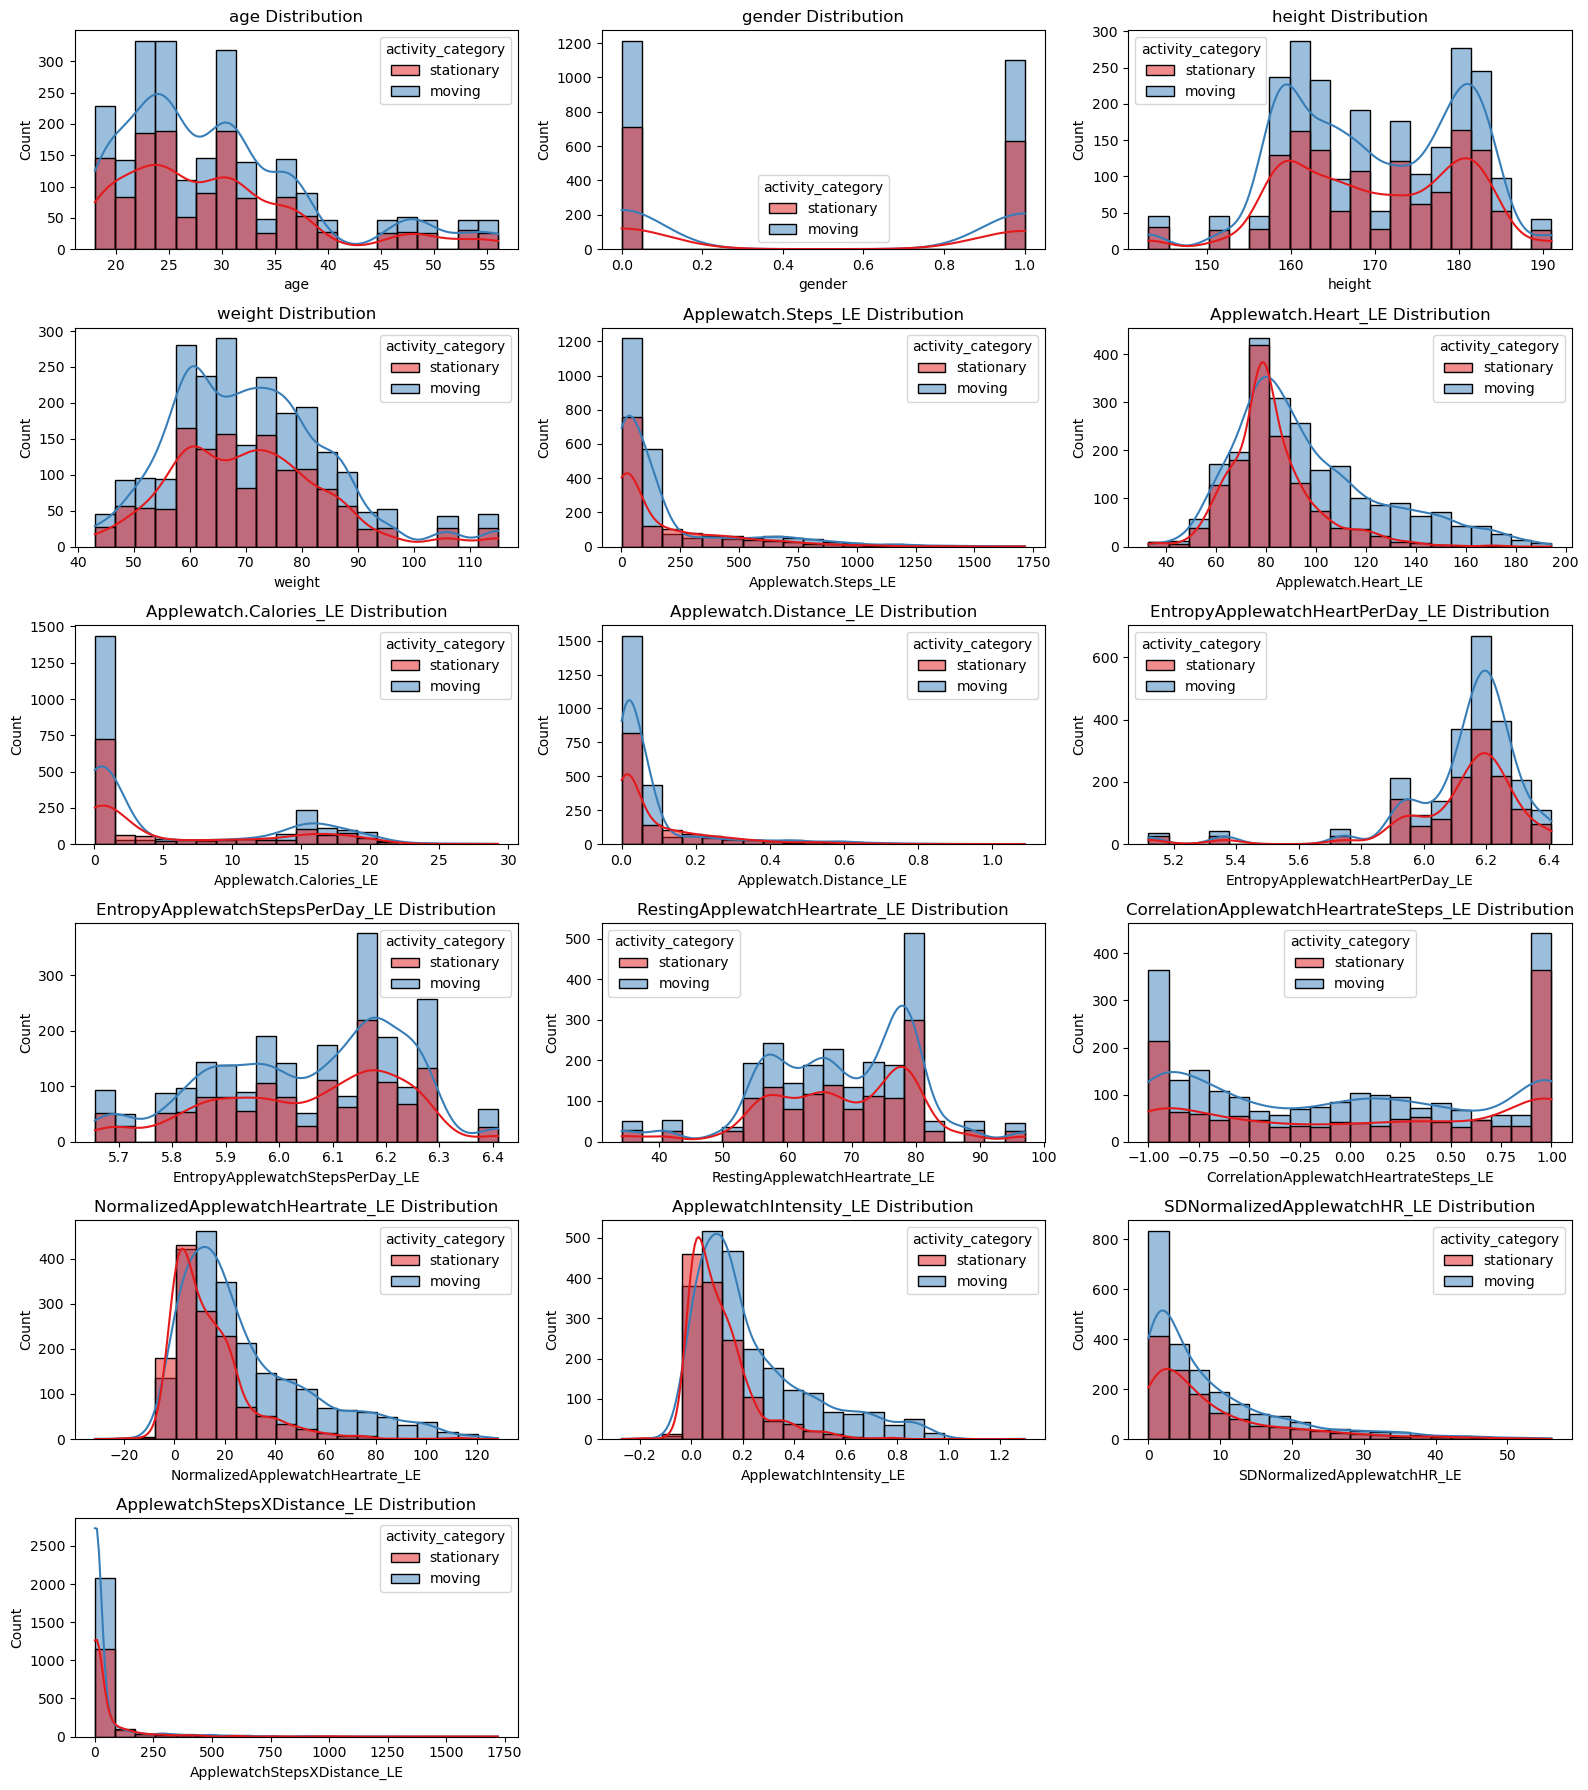

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical features we want to plot
numerical_features = [
    'age',
    'gender',
    'height',
    'weight',
    'Applewatch.Steps_LE',
    'Applewatch.Heart_LE',
    'Applewatch.Calories_LE',
    'Applewatch.Distance_LE',
    'EntropyApplewatchHeartPerDay_LE',
    'EntropyApplewatchStepsPerDay_LE',
    'RestingApplewatchHeartrate_LE',
    'CorrelationApplewatchHeartrateSteps_LE',
    'NormalizedApplewatchHeartrate_LE',
    'ApplewatchIntensity_LE',
    'SDNormalizedApplewatchHR_LE',
    'ApplewatchStepsXDistance_LE'
]

# Plot numerical features vs activity_category
plt.figure(figsize=(16, 18))
for i, feature in enumerate(numerical_features):
    plt.subplot(6, 3, i + 1)
    sns.histplot(data=apple_df, x=feature, hue='activity_category', kde=True, bins=20, palette='Set1')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

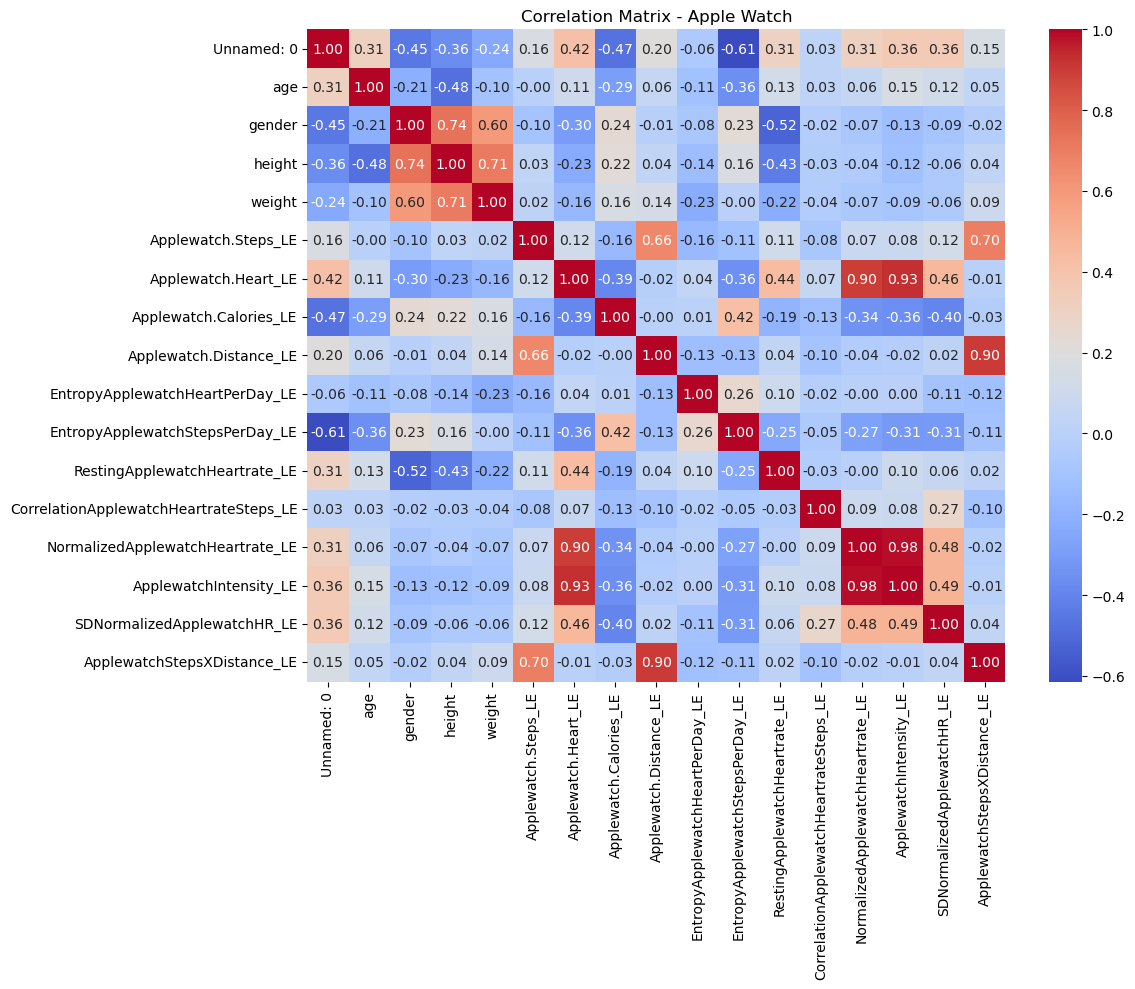

In [4]:
# Correlation matrix
apple_corr = apple_df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(apple_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Apple Watch')
plt.tight_layout()
plt.show()


# Visualization of Fitbit Data

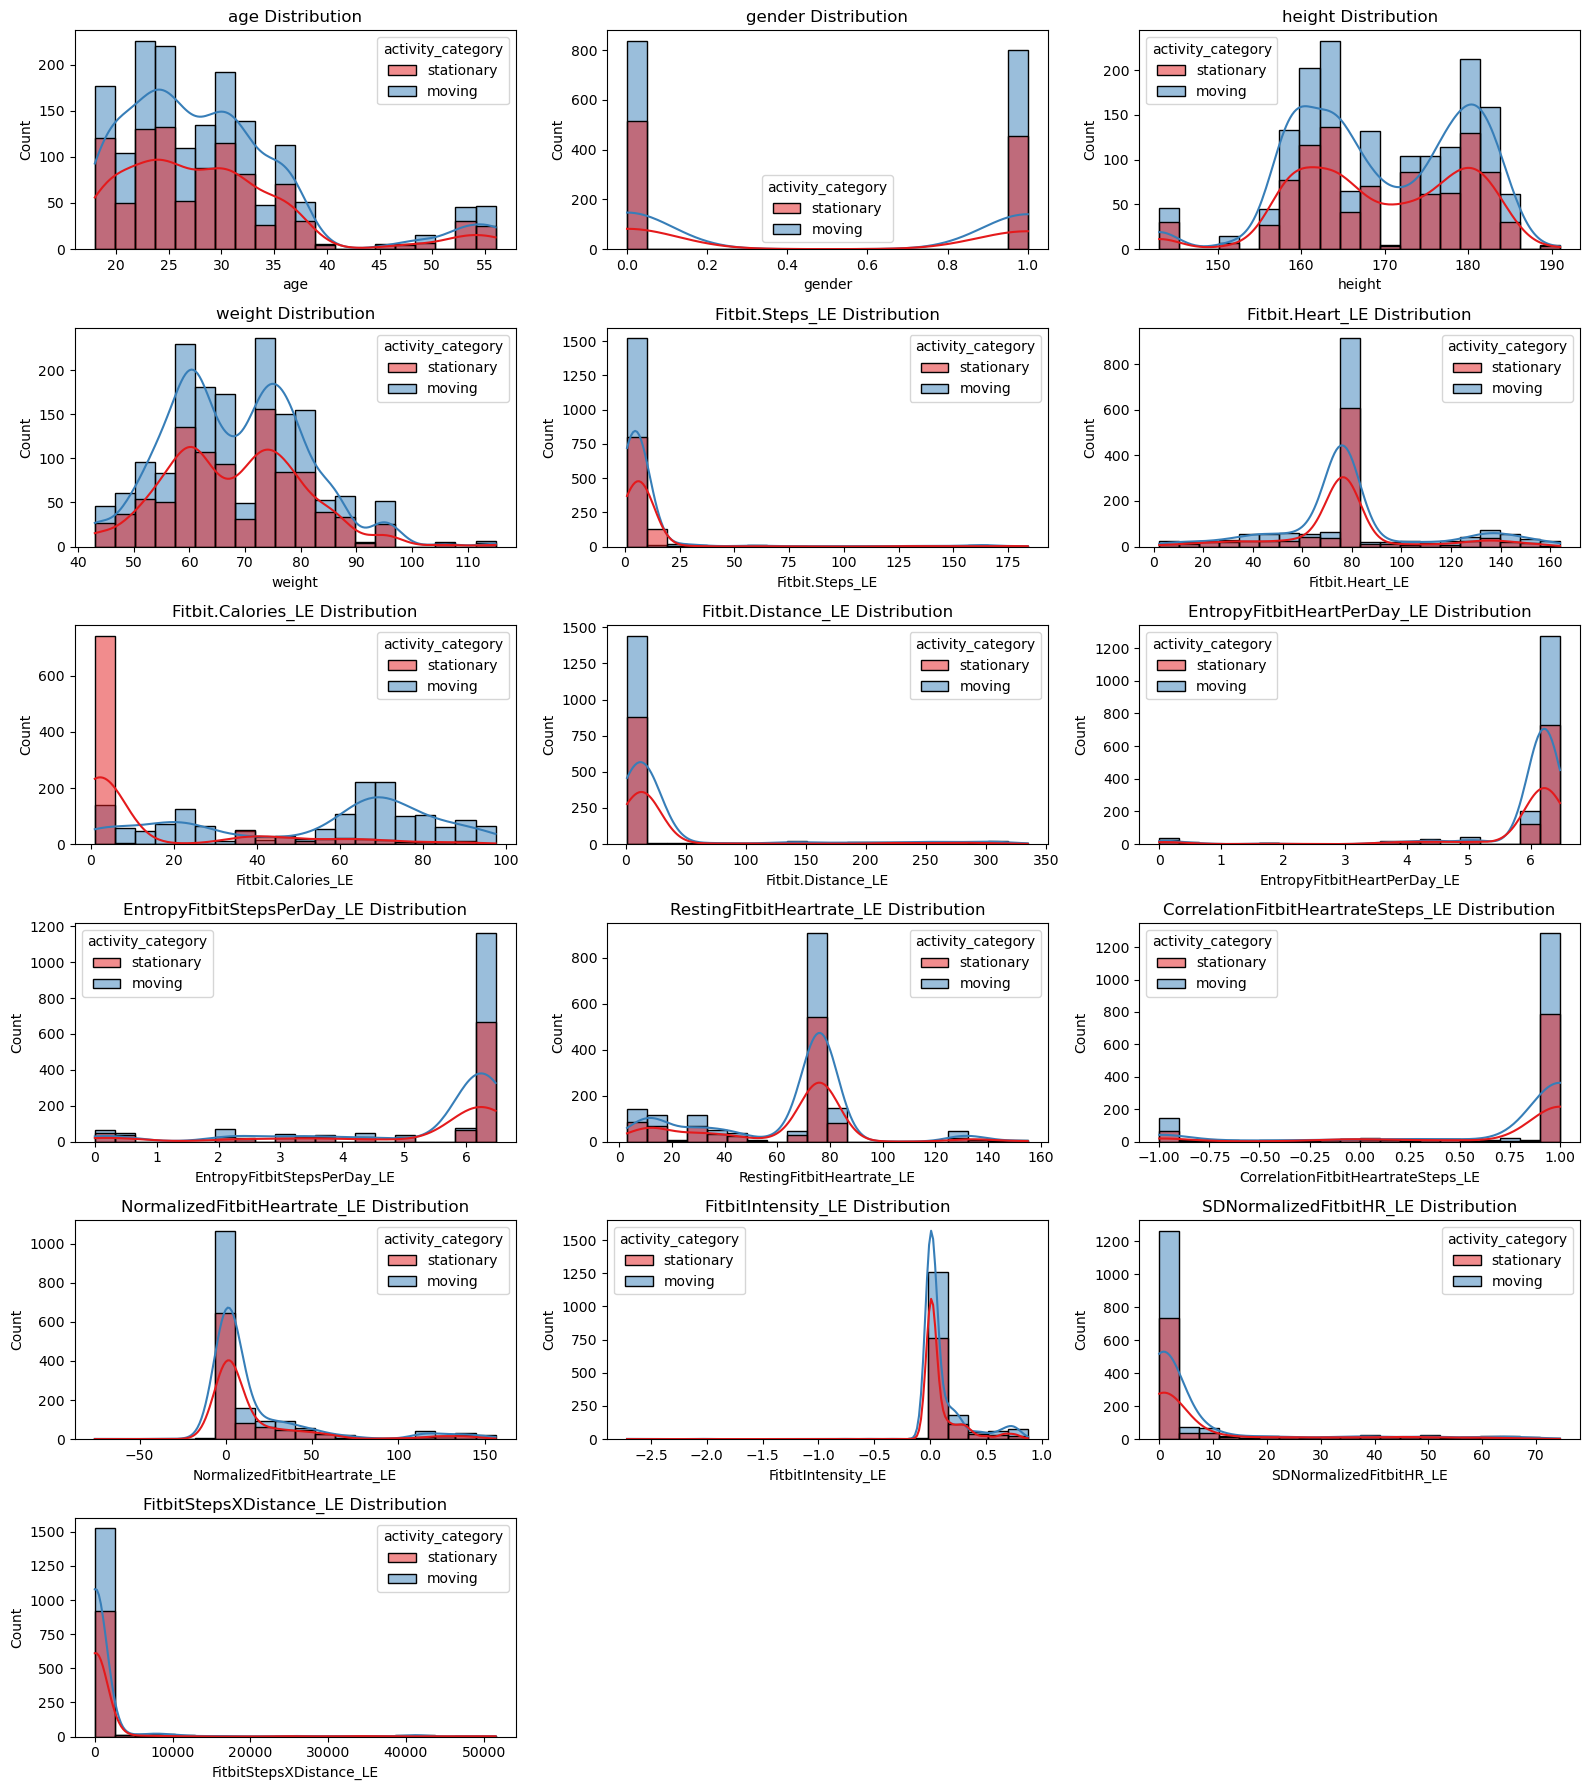

In [5]:
# Define numerical features we want to plot
fitbit_numerical_features = [
    'age',
    'gender',
    'height',
    'weight',
    'Fitbit.Steps_LE',
    'Fitbit.Heart_LE',
    'Fitbit.Calories_LE',
    'Fitbit.Distance_LE',
    'EntropyFitbitHeartPerDay_LE',
    'EntropyFitbitStepsPerDay_LE',
    'RestingFitbitHeartrate_LE',
    'CorrelationFitbitHeartrateSteps_LE',
    'NormalizedFitbitHeartrate_LE',
    'FitbitIntensity_LE',
    'SDNormalizedFitbitHR_LE',
    'FitbitStepsXDistance_LE'
]

# Plot numerical features vs activity_category (Fitbit)
plt.figure(figsize=(16, 18))
for i, feature in enumerate(fitbit_numerical_features):
    plt.subplot(6, 3, i + 1)  # adjust grid based on number of features
    sns.histplot(data=fitbit_df, x=feature, hue='activity_category', kde=True, bins=20, palette='Set1')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()


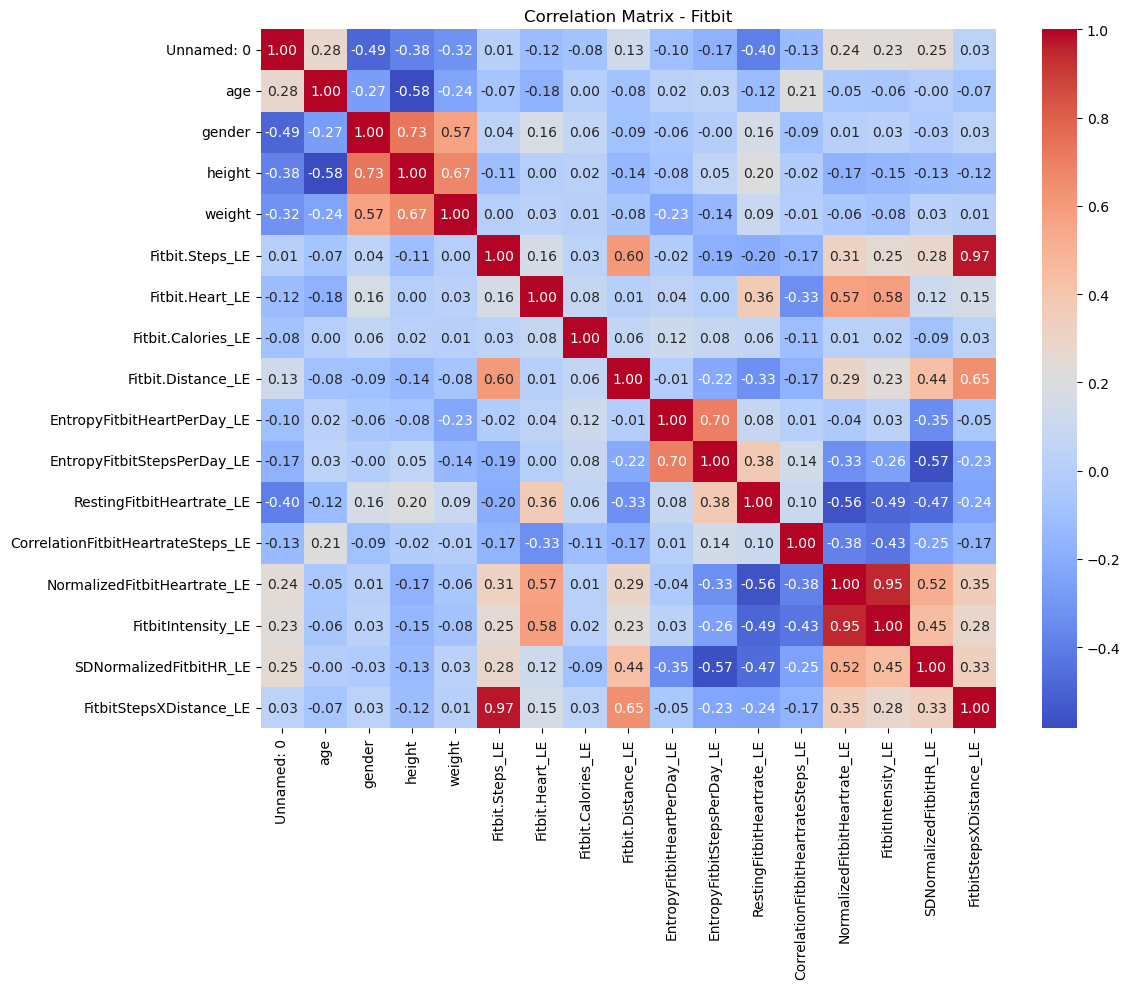

In [6]:
# Correlation matrix for Fitbit
fitbit_corr = fitbit_df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(fitbit_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Fitbit')
plt.tight_layout()
plt.show()


# Preprocessing

Before training machine learning models, we performed feature selection to remove features that are unlikely to contribute meaningfully to the prediction task or are redundant.

Based on exploratory data analysis and domain knowledge, the following features were removed from the dataset:

- **Height** and **weight**: **BMI**, which could be more influential to the prediction, replace them because height and weight are correlated.
- **EntropyHeartPerDay_LE**: Distributions between stationary and moving activities showed little difference.
- **EntropyStepsPerDay_LE**: Distributions between stationary and moving activities showed little difference.
- **RestingHeartrate_LE**: It is a relatively static value, which is not indicative of current activity.
- **CorrelationHeartrateSteps_LE**: Distributions between stationary and moving activities showed little difference.
- **NormalizedHeartrate_LE**: Highly correlated with **Heart_LE** or **Intensity_LE**, removed to avoid redundancy.
- **SDNormalizedHR_LE**: Distributions between stationary and moving activities showed little difference.
- **activity_trimmed**: It was transformed into the binary activity_category variable for this analysis ('stationary' and 'moving').

By removing these features, we aimed to simplify the model and reduce potential noise, focusing only on the most informative features for predicting activity category.

In [7]:
# Apple Watch and Fitbit BMI preprocessing
apple_df['BMI'] = apple_df['weight'] / ((apple_df['height'] / 100) ** 2)
fitbit_df['BMI'] = fitbit_df['weight'] / ((fitbit_df['height'] / 100) ** 2)

# Features to drop for Apple Watch
features_to_drop_aw = [
    'height', 'weight',
    'EntropyApplewatchHeartPerDay_LE',
    'EntropyApplewatchStepsPerDay_LE',
    'RestingApplewatchHeartrate_LE',
    'CorrelationApplewatchHeartrateSteps_LE',
    'NormalizedApplewatchHeartrate_LE',
    'SDNormalizedApplewatchHR_LE',
    'activity_trimmed'
]

# Apple Watch Updated Data
X_apple = apple_df.drop(columns=features_to_drop_aw + ['Unnamed: 0', 'activity_category'])
y_apple = apple_df['activity_category'].map({'stationary': 0, 'moving': 1})

# Features to drop for Fitbit
features_to_drop_fb = [
    'height', 'weight',
    'EntropyFitbitHeartPerDay_LE',
    'EntropyFitbitStepsPerDay_LE',
    'RestingFitbitHeartrate_LE',
    'CorrelationFitbitHeartrateSteps_LE',
    'NormalizedFitbitHeartrate_LE',
    'SDNormalizedFitbitHR_LE',
    'activity_trimmed'
]

# Fitbit Updated Data
X_fitbit = fitbit_df.drop(columns=features_to_drop_fb + ['Unnamed: 0', 'activity_category'])
y_fitbit = fitbit_df['activity_category'].map({'stationary': 0, 'moving': 1})

# Revised Dataset Overview

In [8]:
print(X_apple)
print(y_apple)

      age  gender  Applewatch.Steps_LE  Applewatch.Heart_LE  \
0      20       1            10.771429            78.531302   
1      20       1            11.475325            78.453390   
2      20       1            12.179221            78.540825   
3      20       1            12.883117            78.628260   
4      20       1            13.587013            78.715695   
...   ...     ...                  ...                  ...   
3651   46       0           163.000000           157.250000   
3652   46       0             6.666667           157.307692   
3653   46       0             6.750000           156.250000   
3654   46       0             6.791667           158.090909   
3655   46       0             6.750000           157.230769   

      Applewatch.Calories_LE  Applewatch.Distance_LE  ApplewatchIntensity_LE  \
0                   0.344533                0.008327                0.138520   
1                   3.287625                0.008896                0.137967   
2  

In [9]:
print(X_fitbit)
print(y_fitbit)

      age  gender  Fitbit.Steps_LE  Fitbit.Heart_LE  Fitbit.Calories_LE  \
0      20       1              1.0       132.000000                 1.0   
1      20       1              1.0       132.777778                 1.0   
2      20       1              1.0       129.888889                 1.0   
3      20       1              1.0       129.142857                 1.0   
4      20       1              1.0       134.555556                 3.5   
...   ...     ...              ...              ...                 ...   
2603   46       0              1.0        35.000000                20.5   
2604   46       0              1.0        35.000000                20.5   
2605   46       0              1.0        35.000000                20.5   
2606   46       0              1.0        35.000000                20.5   
2607   46       0              1.0        35.000000                20.5   

      Fitbit.Distance_LE  FitbitIntensity_LE  FitbitStepsXDistance_LE  \
0                    1.0  

# Model Evaluation Function

In [10]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)

def evaluate_model(name, model, X_test, y_test):
    # 1. Predict & predict_proba
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:

        y_score = model.decision_function(X_test)
  
    # 2. Compute metrics
    acc   = accuracy_score(y_test, y_pred)
    prec  = precision_score(y_test, y_pred)
    rec   = recall_score(y_test, y_pred)
    f1    = f1_score(y_test, y_pred)
    
    # 3. Print summary
    print(f"=== {name} ===")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-score : {f1:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))
    
    # 4. Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False,
                xticklabels=["pred 0","pred 1"],
                yticklabels=["true 0","true 1"],
                cmap="Blues")
    plt.title(f"{name} — Confusion Matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


# Binary Logistic Regression 

Binary logistic regression is a form of regression used when the target variable is binary, which means it has only two possible outcomes (such as yes/no, positive/negative, or category 0/1)[El-Habil, 2012]. Unlike linear regression that predicts continuous results, binary logistic regression models the probability that the observed values belong to the positive class (usually marked as 1). It achieves this by applying the sigmoid (logical) function to the linear combination of input features, which converts the result into probabilities between 0 and 1. The relationship between this probability and the explanatory variables is defined as:

$$
f(\mathbf{x}) = \sigma(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p)
$$

The sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

which maps any real-valued input \( z \) to the range (0, 1), allowing the model to represent probabilities.

In this project, the application of binary logistic regression through the LogisticRegression model was employed to classify activity states as either stationary or moving.

# Binary Logistic Regression - Apple Watch Model

=== Binary Logistic Regression (Apple Watch) ===
Accuracy : 0.686
Precision: 0.709
Recall   : 0.856
F1-score : 0.775

Classification Report:
              precision    recall  f1-score   support

           0      0.610     0.392     0.477       268
           1      0.709     0.856     0.775       464

    accuracy                          0.686       732
   macro avg      0.660     0.624     0.626       732
weighted avg      0.673     0.686     0.666       732



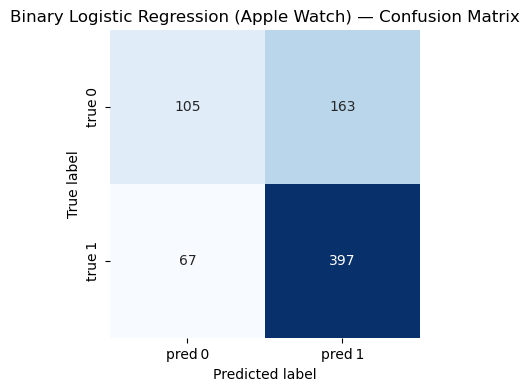

In [11]:
# Prepare data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Split Apple Watch data
X_train_aw, X_test_aw, y_train_aw, y_test_aw = train_test_split(X_apple, y_apple, test_size=0.2, random_state=0, stratify=y_apple)

# Feature scaling
scaler_aw = StandardScaler()
X_train_aw_scaled = scaler_aw.fit_transform(X_train_aw)
X_test_aw_scaled = scaler_aw.transform(X_test_aw)

# Train logistic regression
clf_aw = LogisticRegression(max_iter=1000)
clf_aw.fit(X_train_aw_scaled, y_train_aw)

# Evaluate Model
evaluate_model(
    name="Binary Logistic Regression (Apple Watch)",
    model=clf_aw,
    X_test=X_test_aw_scaled,
    y_test=y_test_aw
)


# Binary Logistic Regression - Fitbit Model

=== Binary Logistic Regression (Fitbit) ===
Accuracy : 0.793
Precision: 0.844
Recall   : 0.823
F1-score : 0.833

Classification Report:
              precision    recall  f1-score   support

           0      0.713     0.742     0.727       194
           1      0.844     0.823     0.833       328

    accuracy                          0.793       522
   macro avg      0.778     0.783     0.780       522
weighted avg      0.795     0.793     0.794       522



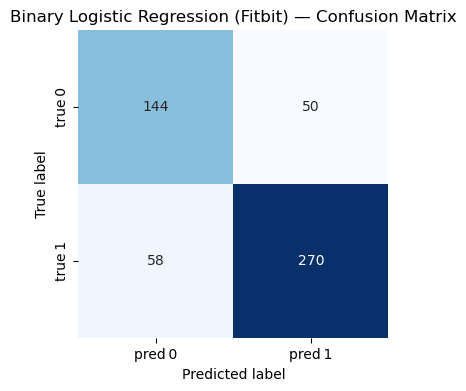

In [12]:
# Split Fitbit data
X_train_fb, X_test_fb, y_train_fb, y_test_fb = train_test_split(X_fitbit, y_fitbit, test_size=0.2, random_state=0, stratify=y_fitbit)

# Feature scaling
scaler_fb = StandardScaler()
X_train_fb_scaled = scaler_fb.fit_transform(X_train_fb)
X_test_fb_scaled = scaler_fb.transform(X_test_fb)

# Train logistic regression
clf_fb = LogisticRegression(max_iter=1000)
clf_fb.fit(X_train_fb_scaled, y_train_fb)

# Evaluate Model
evaluate_model(
    name="Binary Logistic Regression (Fitbit)",
    model=clf_fb,
    X_test=X_test_fb_scaled,
    y_test=y_test_fb
)


# KNN

The KNN algorithm is a simple but powerful method that can be used for classification and regression tasks in supervised learning. In the context of classification, KNN operates by identifying k training examples that are closest to the given input based on the selected distance metric (usually the Euclidean distance) [Zhang, 2025]. Then, it assigns the input to the most common class among these neighbors. KNN is a non-parametric and instance-based method, which means it has no explicit assumptions about the underlying data distribution. Instead, it stores the entire training dataset and uses it directly during prediction. The choice of k has a significant impact on the behavior of the model: a smaller k value may lead to high variance and overfitting, while a larger k value may result in high bias and underfitting. Because KNN relies on distance calculation, it is particularly sensitive to feature scaling - to achieve the best performance, it is usually necessary to standardize or normalize features. In this project, KNN can predict the activity category (stationary or moving) by analyzing the distance of data points from Fitbit or Apple Watch sensors in the feature space.

# KNN - Apple Watch Model

=== K-Nearest Neighbors (Apple Watch) ===
Accuracy : 0.777
Precision: 0.805
Recall   : 0.856
F1-score : 0.830

Classification Report:
              precision    recall  f1-score   support

           0      0.720     0.642     0.679       268
           1      0.805     0.856     0.830       464

    accuracy                          0.777       732
   macro avg      0.762     0.749     0.754       732
weighted avg      0.774     0.777     0.774       732



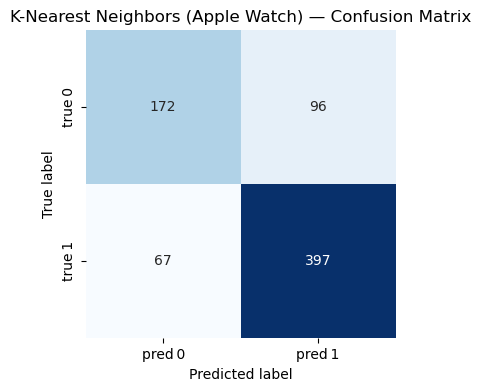

In [13]:
from sklearn.neighbors import KNeighborsClassifier

X_train_aw, X_test_aw, y_train_aw, y_test_aw = train_test_split(
    X_apple, y_apple,
    test_size=0.2,
    random_state=0,
    stratify=y_apple
)

# Initialize KNN
knn_aw = KNeighborsClassifier(n_neighbors=3)

# Train KNN
knn_aw.fit(X_train_aw, y_train_aw)

# Evaluate Model
evaluate_model(
    name="K-Nearest Neighbors (Apple Watch)",
    model=knn_aw,
    X_test=X_test_aw,
    y_test=y_test_aw
)

# KNN - Fitbit Model

=== K-Nearest Neighbors (Fitbit) ===
Accuracy : 0.864
Precision: 0.870
Recall   : 0.921
F1-score : 0.895

Classification Report:
              precision    recall  f1-score   support

           0      0.851     0.768     0.808       194
           1      0.870     0.921     0.895       328

    accuracy                          0.864       522
   macro avg      0.861     0.844     0.851       522
weighted avg      0.863     0.864     0.862       522



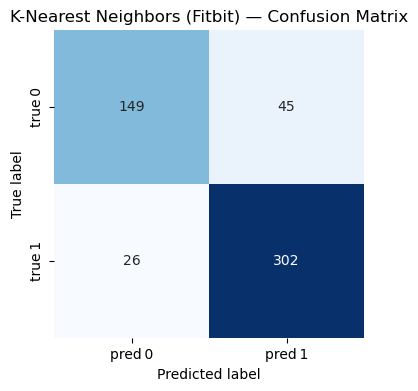

In [14]:
from sklearn.neighbors import KNeighborsClassifier

X_train_fb, X_test_fb, y_train_fb, y_test_fb = train_test_split(
    X_fitbit, y_fitbit,
    test_size=0.2,
    random_state=0,
    stratify=y_fitbit
)

# Initialize KNN
knn_fb = KNeighborsClassifier(n_neighbors=3)

# Train KNN
knn_fb.fit(X_train_fb, y_train_fb)

# Evaluate Model
evaluate_model(
    name="K-Nearest Neighbors (Fitbit)",
    model=knn_fb,
    X_test=X_test_fb,
    y_test=y_test_fb
)

# Decision Tree

Decision tree algorithm is a supervised learning method widely used in classification and regression tasks. In classification problems, decision trees model data by learning a series of if-then-else rules based on eigenvalues, and these eigenvalues divide the data into increasingly pure subsets [Suthaharan and Suthaharan, 2016]. The tree structure consists of nodes (test eigenvalues), branches (representing test results), and leaves (assigning the final class labels). This model is established through a process called recursive segmentation. At each step, the algorithm selects the features and segmentation points that can best separate the data based on criteria such as Gini impurities or information gain. Decision trees are highly interpretable and require minimal preprocessing because they are insensitive to feature scaling and can handle both numerical and categorical data. However, if the trees grow too deep, they may be prone to overfitting and capturing the noise in the training data instead of the general pattern; Techniques such as pruning or setting constraints (such as the maximum depth) are usually used to alleviate this situation.

We will use the Gini Impurity metric to determine the optimal splits. Gini Impurity measures the probability of incorrectly classifying a randomly chosen element from the dataset if it were randomly labeled according to the distribution of labels in the subset:

$$
Gini = 1 - \sum_{i=1}^{2} p_i^2
$$

where \( p_i \) is the probability of a data point belonging to class \( i \).

In this project, a decision tree classifier can be used to distinguish between stationary and moving activities by learning decision rules based on Apple Watch or Fitbit sensor features.

# Decision Trees - Apple Watch Model

=== Decision Tree (Apple Watch) ===
Accuracy : 0.816
Precision: 0.843
Recall   : 0.871
F1-score : 0.857

Classification Report:
              precision    recall  f1-score   support

           0      0.763     0.720     0.741       268
           1      0.843     0.871     0.857       464

    accuracy                          0.816       732
   macro avg      0.803     0.795     0.799       732
weighted avg      0.814     0.816     0.814       732



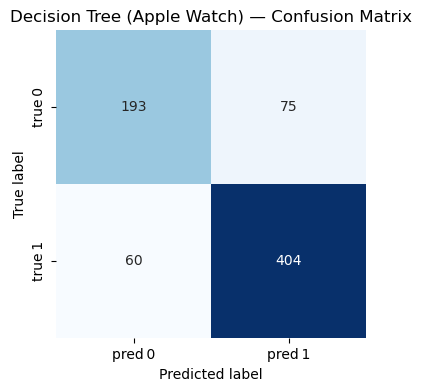

In [15]:
from sklearn.tree import DecisionTreeClassifier

X_train_aw, X_test_aw, y_train_aw, y_test_aw = train_test_split(
    X_apple, y_apple,
    test_size=0.2,
    random_state=0,
    stratify=y_apple
)

# Initialize and train Decision Tree
dt_aw = DecisionTreeClassifier(random_state=0)
dt_aw.fit(X_train_aw, y_train_aw)

# Evaluate Model
evaluate_model(
    name="Decision Tree (Apple Watch)",
    model=dt_aw,
    X_test=X_test_aw,
    y_test=y_test_aw
)

# Decision Trees - Fitbit Model

=== Decision Tree (Fitbit) ===
Accuracy : 0.885
Precision: 0.896
Recall   : 0.924
F1-score : 0.910

Classification Report:
              precision    recall  f1-score   support

           0      0.864     0.820     0.841       194
           1      0.896     0.924     0.910       328

    accuracy                          0.885       522
   macro avg      0.880     0.872     0.876       522
weighted avg      0.884     0.885     0.884       522



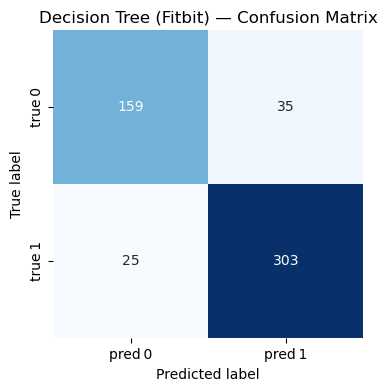

In [16]:
X_train_fb, X_test_fb, y_train_fb, y_test_fb = train_test_split(
    X_fitbit, y_fitbit,
    test_size=0.2,
    random_state=0,
    stratify=y_fitbit
)

# Initialize and train Decision Tree
dt_fb = DecisionTreeClassifier(random_state=0)
dt_fb.fit(X_train_fb, y_train_fb)

# Evaluate Model
evaluate_model(
    name="Decision Tree (Fitbit)",
    model=dt_fb,
    X_test=X_test_fb,
    y_test=y_test_fb
)

# Random Forest

Random forest is an ensemble learning method used for both classification and regression tasks. They consist of a collection of randomized base regression trees. Each tree is built using a different random subset of the training data and a random subset of features [Biau, 2012]. The outputs of these individual trees are then aggregated to form the final prediction. In this study, the features include variables such as Steps, Heart Rate, Calories, and more, derived from wearable devices.

The final aggregated regression estimate is computed as:

$$
\bar{r}_n(X, \mathcal{D}_n) = \mathbb{E}_{\Theta} \left[ r_n(X, \Theta, \mathcal{D}_n) \right],
$$

In this project, a random forest classifier can be used to distinguish between stationary and moving activities by aggregating decision rules from multiple randomized decision trees based on Apple Watch or Fitbit sensor features.

# Random Forest - Apple Watch Model

=== Random Forest (Apple Watch) ===
Accuracy : 0.866
Precision: 0.884
Recall   : 0.907
F1-score : 0.896

Classification Report:
              precision    recall  f1-score   support

           0      0.832     0.795     0.813       268
           1      0.884     0.907     0.896       464

    accuracy                          0.866       732
   macro avg      0.858     0.851     0.854       732
weighted avg      0.865     0.866     0.865       732



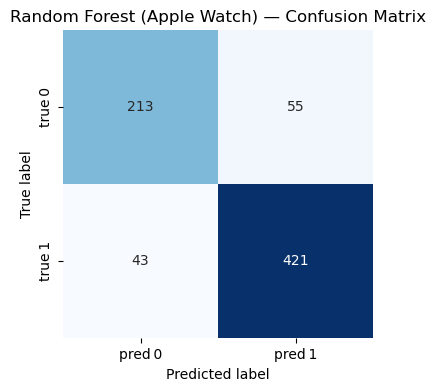

In [17]:
from sklearn.ensemble import RandomForestClassifier

X_train_aw, X_test_aw, y_train_aw, y_test_aw = train_test_split(
    X_apple, y_apple,
    test_size=0.2,
    random_state=0,
    stratify=y_apple
)

# Initialize and train Random Forest with 500 trees
rf_aw = RandomForestClassifier(n_estimators=500, random_state=0)
rf_aw.fit(X_train_aw, y_train_aw)

# Evaluate Model
evaluate_model(
    name="Random Forest (Apple Watch)",
    model=rf_aw,
    X_test=X_test_aw,
    y_test=y_test_aw
)

# Random Forest - Fitbit Model

=== Random Forest (Fitbit) ===
Accuracy : 0.910
Precision: 0.905
Recall   : 0.957
F1-score : 0.930

Classification Report:
              precision    recall  f1-score   support

           0      0.920     0.830     0.873       194
           1      0.905     0.957     0.930       328

    accuracy                          0.910       522
   macro avg      0.912     0.894     0.901       522
weighted avg      0.911     0.910     0.909       522



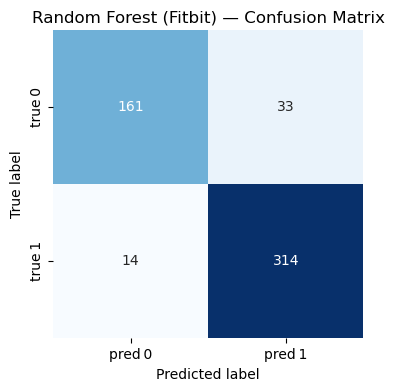

In [18]:
X_train_fb, X_test_fb, y_train_fb, y_test_fb = train_test_split(
    X_fitbit, y_fitbit,
    test_size=0.2,
    random_state=0,
    stratify=y_fitbit
)

# Initialize and train Random Forest with 500 trees
rf_aw = RandomForestClassifier(n_estimators=500, random_state=0)
rf_aw.fit(X_train_fb, y_train_fb)

# Evaluate Model
evaluate_model(
    name="Random Forest (Fitbit)",
    model=rf_aw,
    X_test=X_test_fb,
    y_test=y_test_fb
)

# Conclusion

The results of this study demonstrate that commercial wearable devices, particularly the Fitbit Charge HR2, are more capable of predicting users’ physical activity accurately. Among the four models tested, the random forest model achieved the highest accuracy for both devices. This suggests that the ensemble learning approach of random forests— which aggregates predictions from multiple decision trees— is especially well-suited for this type of predictive analysis.

However, the study has several limitations. First, it was conducted on a convenience sample of 49 participants, which may not be representative of the broader population. The relatively small sample size and limited population diversity constrain the generalizability of the findings to all potential users. Second, the study evaluated only two specific models of wearable devices. The results may not extend to other models or brands, as these may differ in sensor features and data accuracy.

Another limitation lies in the quality of the data collected by the wearable devices. Prediction accuracy is highly dependent on sensor data, and any inaccuracies or inconsistencies in sensor readings can significantly affect model performance. For example, the dataset contained possible errors in the Apple Watch Series 2 data, such as an abnormally low average resting heart rate. Due to these concerns, this type of data was excluded from the machine learning analyses.

To address these limitations, future studies should recruit a larger and more diverse sample of participants. Expanding the sample will help ensure that the results are more representative and generalizable to a wider population. Additionally, future research should include multiple models from different manufacturers. This will enable comparisons of sensor characteristics and data accuracy across devices, providing a more comprehensive understanding of their predictive capabilities. Finally, future studies should consider integrating data from multiple sources to cross-validate the accuracy of wearable devices. For instance, incorporating additional sensors or external measurement tools, such as chest-strap heart rate monitors, could help verify the readings obtained from wearable devices.

# Reference

[Biau, 2012] Biau, G. (2012). Analysis of a random forests model. The Journal of Machine Learning
Research, 13(1):1063–1095.

[El-Habil, 2012] El-Habil, A. M. (2012). An application on multinomial logistic regression model. Pakistan
journal of statistics and operation research, pages 271–291.

[Kaggle, n.d.] Kaggle. (n.d.). Apple Watch and Fitbit Data. Retrieved from https://www.kaggle.com/datasets/aleespinosa/apple-watch-and-fitbit-data.

[OpenAI, 2025] OpenAI. (2025). ChatGPT. Retrieved from https://chatgpt.com/.

[Suthaharan and Suthaharan, 2016] Suthaharan, S. and Suthaharan, S. (2016). Decision tree learning. Ma-
chine Learning Models and Algorithms for Big Data Classification: Thinking with Examples for Effective
Learning, pages 237–269.

[Zhang, 2025] Zhang, R. (2025). Class Lecture Notes for Math 10, Spring 2025. Retrieved from https://rayzhangzirui.github.io/math10sp25/notes/notes_intro.html.